This is code used to generate the growth rates for the different KOs (figure 4A).

The general principle is that the instantaneous growth rate is calculate between every time point $\frac{dX}{dt}$ for all the time points minus one. Filtering is applied to the $\frac{dX}{dt}$ over time profile (orange lines). The maximum of the filtering is taken as the growth rate.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#specify where the data is
filename = '2018-02-22 growth-2.xlsx'
sheetname = 'Sheet2'

df1 = pd.read_excel(filename, index_col=0)

#convert to spectrophotometer measurements

#the wells corresponding to the blank
blank =  np.average(np.array(df1.loc["A1":"A10"], dtype=float))

asX = np.array(df1.loc["B2":"F10"], dtype=float) - blank

#formula for empirical conversions of OD to the one that we use for our spectrophotometer
df1.loc["B2":"F10"] = 1.5*np.power(asX,4) - 2*np.power(asX,3) + 2* np.power(asX,2) + 2.27*asX

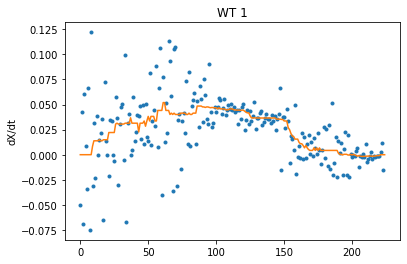

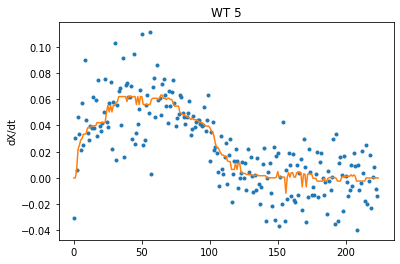

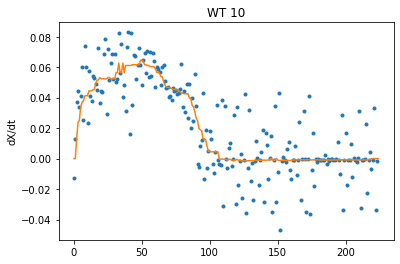

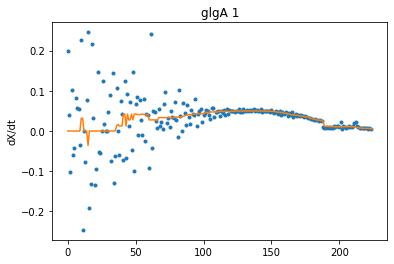

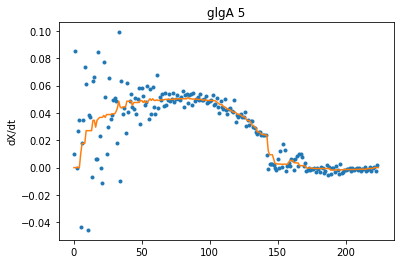

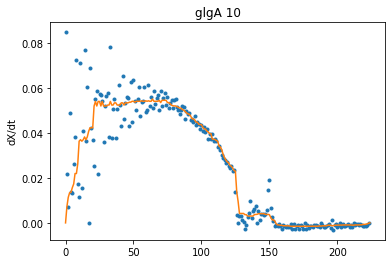

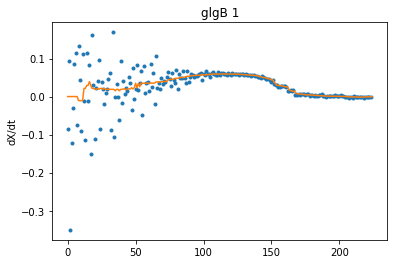

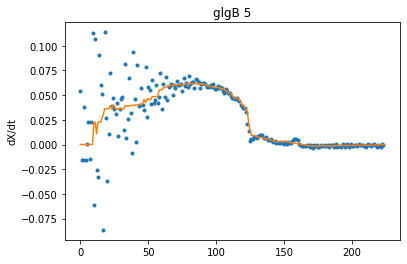

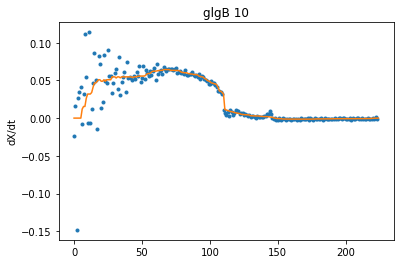

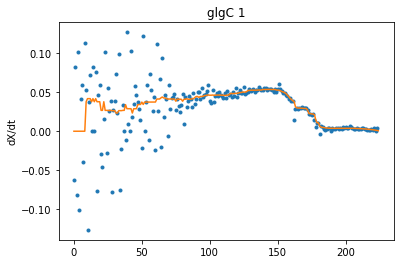

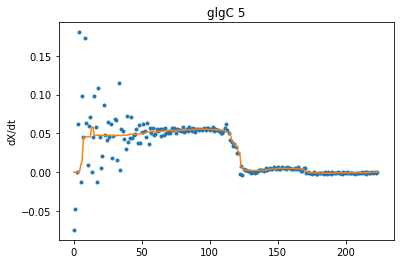

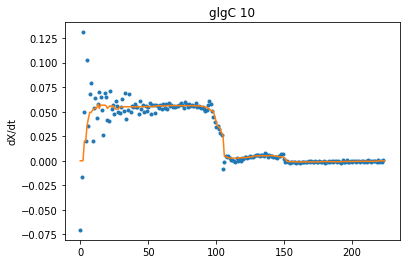

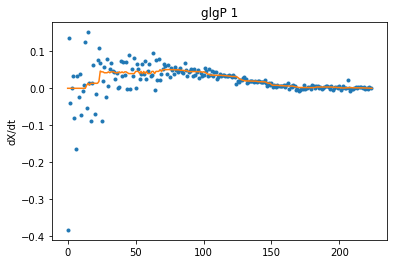

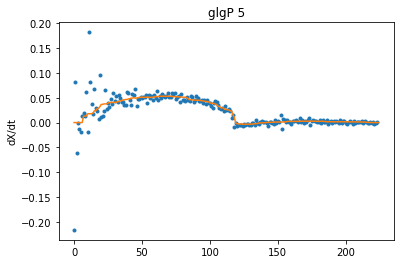

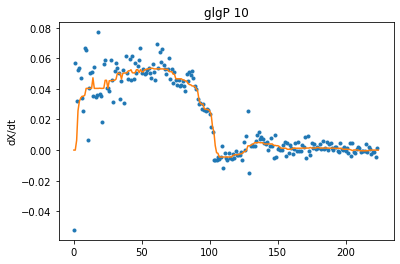

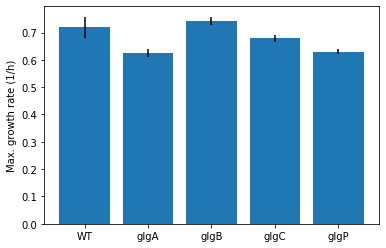

<Figure size 432x288 with 0 Axes>

In [7]:
from scipy.signal import medfilt

#specify the range of the appropriate wells. The 1, 5, and 10 refers the amount of inoculum in each well (uL)
desDict = {
            "WT": {
                1: ["B2", "B4"],
                5: ["B5", "B7"],
                10: ["B8", "B10"]
            },
            "glgA": {
                1: ["C2", "C4"],
                5: ["C5", "C7"],
                10: ["C8", "C10"]
            },
            "glgB": {
                1: ["D2", "D4"],
                5: ["D5", "D7"],
                10: ["D8", "D10"]
            },
            "glgC": {
                1: ["E2", "E4"],
                5: ["E5", "E7"],
                10: ["E8", "E10"]
            },
            "glgP": {
                1: ["F2", "F4"],
                5: ["F5", "F7"],
                10: ["F8", "F10"]
            }
}

#initialize the dictionary to hold all of the growth rates
grDict = {key: [] for key in desDict.keys()}

#go through the data and calculate the growth rate for each condition
for key in desDict.keys():
    for subkey in desDict[key].keys():
        temp = np.array(df1.loc[desDict[key][subkey][0]:desDict[key][subkey][-1],:], dtype = float)
        avg = np.average(temp, axis=0)
        growthrates = np.log(avg[1:]) - np.log(avg[:-1])
        filtered = medfilt(growthrates, kernel_size =21)
        grDict[key].append(np.max(filtered[~np.isnan(filtered)])) #look for the maximum value. don't consider nan values 
        plt.plot(growthrates[1:], '.')
        plt.plot(filtered)
        plt.title(key + " " + str(subkey))
        plt.ylabel('dX/dt')
        plt.show()

#print(grDict)

#calculate the mean
means = [np.average(grDict[key])*12 for key in grDict.keys()] #convert to 1/h
stderr = [np.std(grDict[key]) * 12/np.sqrt(3) for key in grDict.keys()]

fig, ax = plt.subplots()
pos = np.arange(len(means))
plt.bar(pos,means, yerr = stderr)
ax.set_xticks(pos)
ax.set_xticklabels([key for key in grDict.keys()])
plt.ylabel('Max. growth rate (1/h)')
plt.show()
plt.savefig('growthrates.svg')
       